result :  [[1.]]
neighbours : [[1. 0. 1.]]
distance :  [[ 61. 360. 545.]]


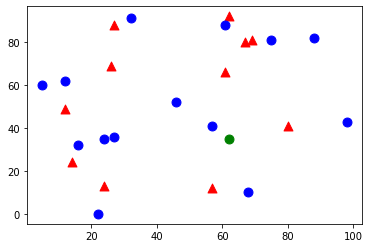

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

#각 데이터의 위치 : 25 * 2 크기에 각각 0 ~ 100
trainData = np.random.randint(0, 100, (25, 2)).astype(np.float32)
# 각 데이터는 0 or 1(네모는 1, 세모는 0)
response = np.random.randint(0, 2, (25, 1)).astype(np.float32)

#값이 0인 데이터를 각각 (x, y) 위치에 빨간색으로 칠합니다.
red = trainData[response.ravel() == 0]
plt.scatter(red[:, 0], red[:, 1], 80, 'r', '^')
#값이 1인 데이터를 각rkr (x, y) 위치에 파란색으로 칠합니다.
blue = trainData[response.ravel() == 1]
plt.scatter(blue[:, 0], blue[:, 1], 80, 'b', 'o')

#(0 ~ 100, 0~ 100) 위치의 데이터를 하나 생성해 칠합니다.
newcomer = np.random.randint(0, 100, (1, 2)).astype(np.float32)
plt.scatter(newcomer[:, 0], newcomer[:, 1], 80, 'g', 'o')

knn = cv2.ml.KNearest_create()
knn.train(trainData, cv2.ml.ROW_SAMPLE, response)
ret, results, neighbours, dist = knn.findNearest(newcomer, 3)

#가까운 3개를 찾고 ,거리를 고려하여 자신을 정합니다.
print("result : ", results)
print("neighbours :", neighbours)
print("distance : ", dist)

plt.show()

In [9]:
import cv2
import numpy as np

img = cv2.imread('dgit.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#세로로 50줄, 가로로 100줄로 사진을 나눕니다
cells = [np.hsplit(row, 100) for row in np.vsplit(gray, 50)]
x = np.array(cells)
print(x.shape)

# 각 (20 * 20) 크기의 사진을 한 줄 (1 * 400)으로 바꿉니다
train = x[:, :].reshape(-1, 400).astyoe(np.float32)

# 0이 500개, 1이 500개, ... 로 총 5000개가 들어가는 (1 * 5000) 배열을 만듭니다
k = np.arange(10)
train_labels = np.repeat(k, 500)[:, np.newaxis]

np.svez("trained.npz", train = train, train_labels = train_labels)

ValueError: array split does not result in an equal division